In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


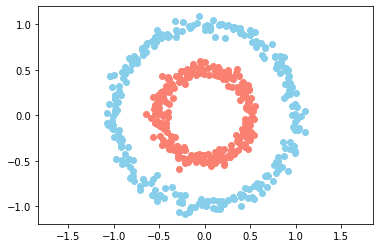

In [58]:
# Crear el dataser

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [28]:
# Clase de la capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)     * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

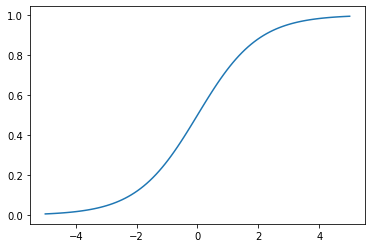

In [22]:
# Funciones de activacion 

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

# relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [33]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
# ...

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn


In [68]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z) 

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) - 1:
        # Calcular delta última capa. Delta 0.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))

      _w = neural_net[l].w

    # Gradient descent
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
    neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

0.27809020177697297



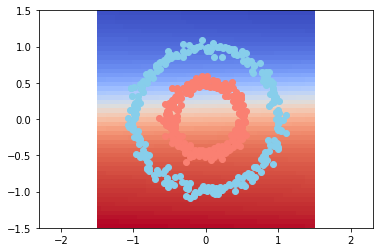

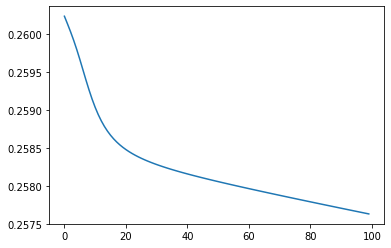

0.2576286213565622
0.2576282894111357
0.25762795748143635
0.2576276255674571
0.2576272936691907
0.2576269617866301
0.2576266299197681
0.25762629806859777
0.2576259662331118
0.2576256344133034
0.2576253026091654
0.25762497082069086
0.25762463904787286
0.2576243072907044
0.25762397554917854
0.25762364382328856
0.25762331211302736
0.25762298041838816
0.25762264873936425
0.25762231707594874
0.25762198542813486
0.2576216537959158
0.2576213221792849
0.25762099057823545


In [70]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  # Entrenamos a la red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:

    print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)



---

